### Introduction to the Dataset

### Overview of the Columns in the Dataset

___
Below is a detailed description of the columns in the dataset:

- **age**: The age of the customer. This is important because age may influence financial decision-making, risk tolerance, and interest in term deposits.

- **job**: The type of job the customer holds (e.g., "admin.", "blue-collar", "technician", etc.). Job type could reflect the customer’s income level, job stability, and overall financial behavior, which may impact their likelihood of subscribing to a term deposit.

- **marital**: The marital status of the customer (e.g., "married", "single", "divorced"). Marital status can influence financial decisions, as people with families may have different savings goals compared to singles.

- **education**: The level of education the customer has attained (e.g., "primary", "secondary", "tertiary"). A customer’s education level may correlate with their financial knowledge, which could affect their interest in financial products like term deposits.

- **balance**: The average yearly balance in euros. A higher balance could indicate a wealthier or more financially stable customer who may be more likely to invest in a term deposit.

- **contact**: The type of communication used to reach the customer (e.g., "cellular", "telephone"). This column helps understand the methods the bank uses to contact the customer, as different contact types may be more or less effective in reaching customers.

- **day**: The last contact day of the month. This indicates when the final contact attempt was made during the month, which might influence the customer's decision-making process based on timing.

- **month**: The last contact month of the year. The month of contact could reveal seasonal trends that may influence a customer’s decision to invest in a term deposit.

- **duration**: The duration of the last contact in seconds. Longer conversations may indicate higher engagement from the customer, which could increase the likelihood of a positive response.

- **campaign**: The number of contacts made during the current campaign. A **campaign** refers to a series of marketing efforts designed to persuade customers to subscribe to a term deposit. Multiple contacts may indicate persistence and effort to convert the customer.

- **pdays**: The number of days since the customer was last contacted. If the value is **-1**, it means the customer has never been contacted before. The recency of contact could affect the customer’s response.

- **previous**: The number of contacts made during the previous marketing campaign. This column provides context about past interactions and helps assess how previous efforts may influence the current campaign.

- **poutcome**: The outcome of the previous marketing campaign (e.g., "failure", "success", "nonexistent"). This column can help determine whether past success or failure influences future marketing efforts.

- **deposit**: Whether the customer subscribed to a term deposit ("yes" or "no"). This is the **target variable** of the project, and the goal is to predict this column.

- **default**: Whether the customer has a history of defaulting on credit or loan payments ("yes" or "no"). A history of default could influence the customer's financial stability and their willingness to invest in term deposits.

- **housing**: Whether the customer has a housing loan ("yes" or "no"). A housing loan may impact the customer’s financial flexibility, which could make them less likely to subscribe to a term deposit.

- **loan**: Whether the customer has a personal loan ("yes" or "no"). Personal loans can similarly affect a customer's ability to invest in a term deposit, depending on their current financial obligations.
___


___
### Aim of the Project
___

The primary aim of this project is to build a **predictive model** that can accurately predict whether a customer will subscribe to a term deposit, based on their demographic information, contact history, and engagement with previous marketing campaigns. By analyzing these customer features, the goal is to improve the bank's ability to target the right customers, ultimately leading to better conversion rates for their marketing efforts.

In this project, a **Decision Tree Classifier** will be used to create the predictive model. The Decision Tree Classifier will help identify the most important factors that influence whether a customer subscribes to a term deposit, allowing the bank to optimize their marketing strategies.

By applying this model to a sample of customer data, the project will evaluate the effectiveness of using customer characteristics to predict their likelihood of subscribing to a term deposit, improving the overall efficiency of the marketing campaigns.
___

## **_Let's Get Started with Building the Decision Tree Classifier_**

### 1,Importing necessary libraries

In [1]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import plotly.figure_factory as ff
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline

### 2, Loading the dataset

In [2]:
# Load the dataset from 
df_bank = pd.read_csv('Bank.csv') 

# Show the first few rows to check the data
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 3,Explore the dataset

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


___
### Observations

- The dataset contains **11,162 entries** and **17 columns**.
- Out of these columns:
    - **7 columns** have a data type of `int64`.
    - **10 columns** have a data type of `object`.
- There are **no missing values** in any of the columns.

___

In [4]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


___ 
#### Observations

- **Age**:
  - The average age of customers is approximately 41.2 years.
  - The age range spans from 18 to 95 years, indicating a broad demographic.

- **Balance**:
  - The average balance is around 1528.5, with a high standard deviation of 3225.4, suggesting significant variation in account balances.
  - The minimum balance is -6847, indicating that some customers have negative balances (likely due to overdrafts).
  - The maximum balance is 81204, suggesting a few high-balance customers.

- **Day**:
  - The average day of contact is approximately 15.7, which may indicate a preference for mid-month contact.
  - The minimum and maximum values of 1 and 31 show that contacts span all days of the month.

- **Duration**:
  - The average duration of contact is 372 seconds, with a standard deviation of 347, indicating some variability in call durations.
  - The minimum duration is 2 seconds, while the maximum is 3881 seconds, suggesting a wide range in call times.

- **Campaign**:
  - On average, each customer was contacted about 2.5 times within a campaign.
  - The maximum number of contacts to a single customer is 63, indicating some cases of very high contact frequency.

- **Pdays**:
  - The mean is 51.3, but there is a large standard deviation of 108.8, suggesting varied intervals since the last contact.
  - The minimum value of -1 typically represents no previous contact, and most values in the 25th, 50th, and 75th percentiles are also -1, meaning many customers were not previously contacted.

- **Previous**:
  - The average previous contact count is 0.83, with a high maximum of 58, indicating that while most customers had few previous contacts, some were contacted multiple times.
  - The 25th, 50th, and 75th percentiles are all at or near 0, indicating most customers had minimal prior contact history.
  ___


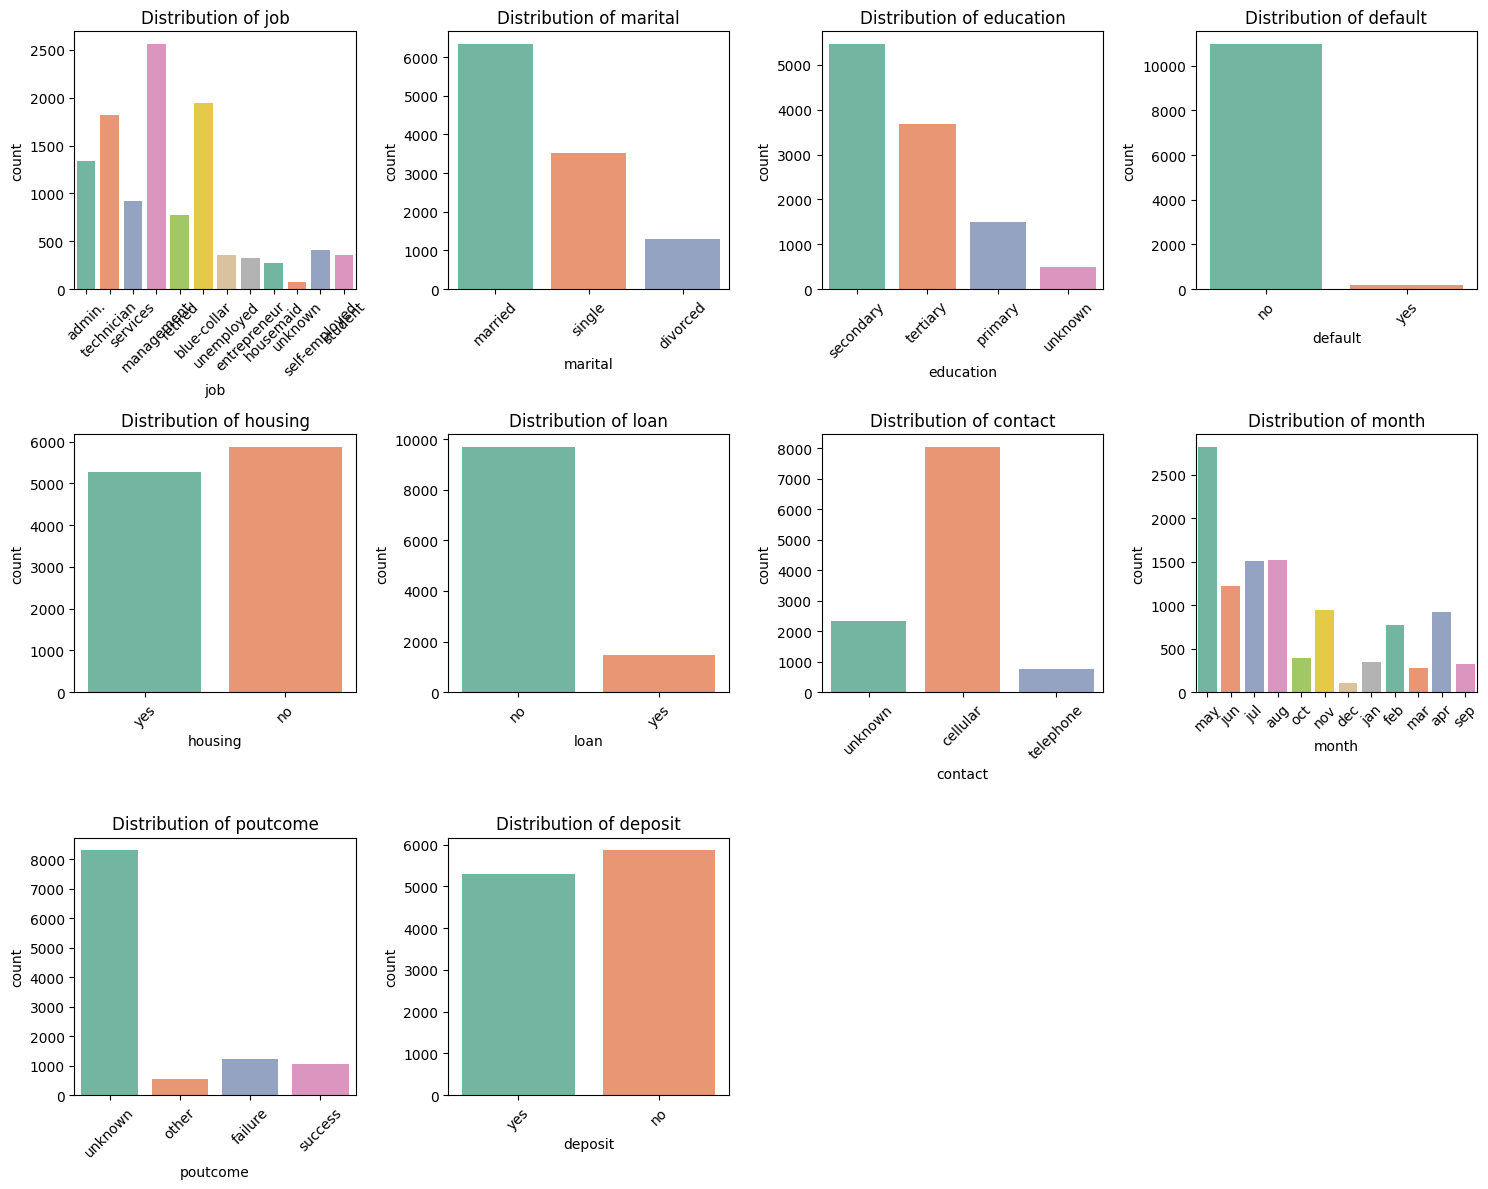

In [5]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Loop through the categorical columns to plot bar graphs
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns of plots
    sns.countplot(data=df_bank, x=column, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()
plt.show()


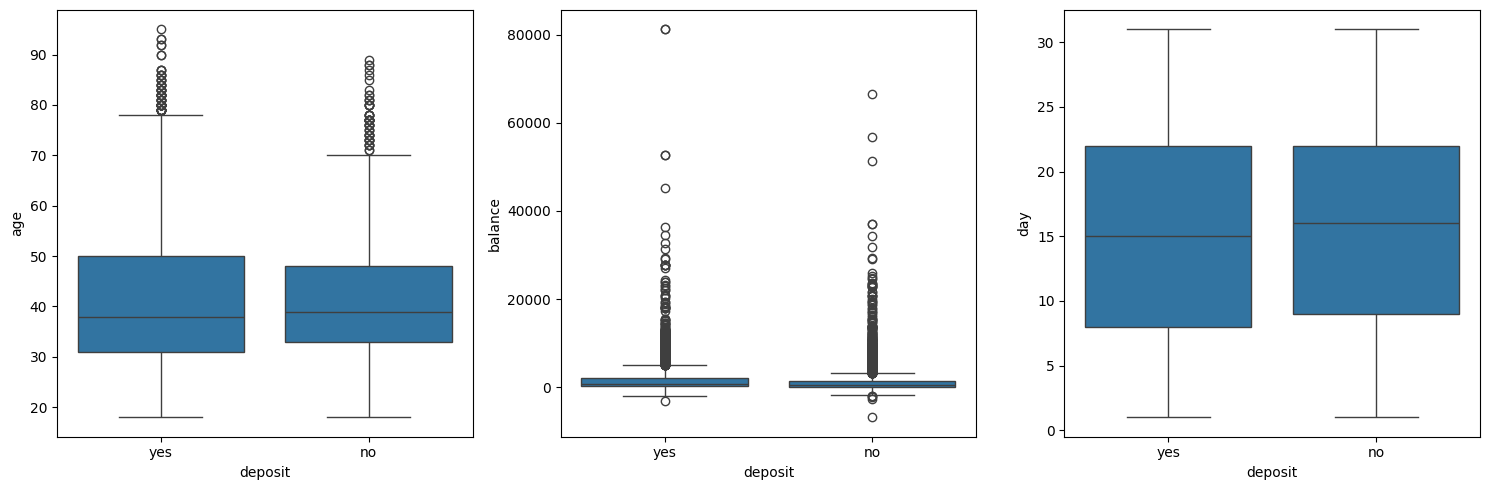

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first 3 numeric columns for plotting (or specify specific columns)
numeric_columns = df_bank.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure there are at least 3 numeric columns in the DataFrame
if len(numeric_columns) >= 3:
    # Select the first 3 numeric columns for the box plots
    selected_columns = numeric_columns[:3]
else:
    selected_columns = numeric_columns  # If there are fewer than 3 numeric columns, select all

# Set up the figure to plot 3 box plots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each of the selected numeric columns
for i, column in enumerate(selected_columns):
    sns.boxplot(data=df_bank, x='deposit', y=column, ax=axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


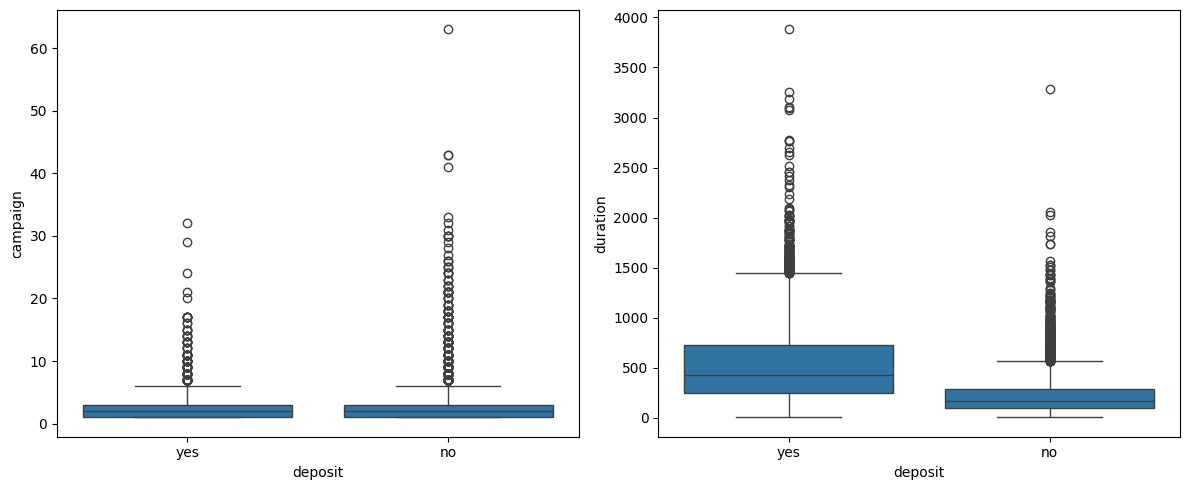

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the 'campaign' and 'duration' numeric columns for plotting
selected_columns = ['campaign', 'duration']

# Set up the figure to plot 2 box plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot each of the selected numeric columns
for i, column in enumerate(selected_columns):
    sns.boxplot(data=df_bank, x='deposit', y=column, ax=axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


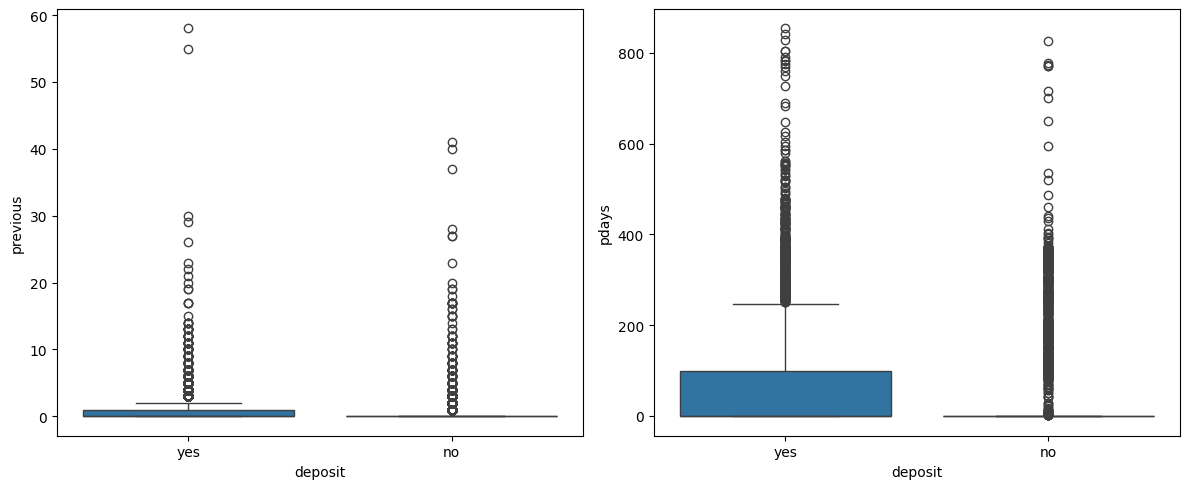

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the 'previous' numeric column and 'poutcome' categorical column for plotting
selected_columns = ['previous', 'pdays']

# Set up the figure to plot 2 box plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 'previous' (numeric) against 'deposit' and 'poutcome' (categorical) against 'deposit'
for i, column in enumerate(selected_columns):
    sns.boxplot(data=df_bank, x='deposit', y=column, ax=axes[i]) if column != 'poutcome' else sns.countplot(data=df_bank, x=column, hue='deposit', ax=axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [10]:
a=df_bank['deposit'].value_counts()
a

deposit
no     5873
yes    5289
Name: count, dtype: int64